# Question 1

## Load the data using pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

### Read and split data into train(1-3), test(1-3)

In [2]:
os.chdir('C:/Users/gilmo/OneDrive/Documents/EEL 5840')

df=pd.read_csv('beerfoam2a.csv')

df.drop(df.columns[2:5],axis=1,inplace=True)

df1 = df.iloc[0:15]
df1_train = df.iloc[0:12]  #12 samples
df1_test = df.iloc[12:15]  #3 samples

df2 = df.iloc[15:30]
df2_train = df.iloc[15:27]
df2_test = df.iloc[27:30]

df3 = df.iloc[30:]
df3_train = df.iloc[30:42]
df3_test = df.iloc[42:]

#True curves
x1_true = df1.foamTime.to_numpy()  
t1_true = df1.foamHt.to_numpy()

x2_true = df2.foamTime.to_numpy()
t2_true = df2.foamHt.to_numpy()

x3_true = df3.foamTime.to_numpy()
t3_true = df3.foamHt.to_numpy()

### Generate X1-X3 training sets

In [3]:
M=4
x1_train = df1_train.foamTime.to_numpy()
t1_train = df1_train.foamHt.to_numpy()
X1_train = np.array([x1_train**i for i in range(M+1)]).T

x2_train = df2_train.foamTime.to_numpy()
t2_train = df2_train.foamHt.to_numpy()
X2_train = np.array([x2_train**i for i in range(M+1)]).T

x3_train = df3_train.foamTime.to_numpy()
t3_train = df3_train.foamHt.to_numpy()
X3_train = np.array([x3_train**i for i in range(M+1)]).T

### Generate X1-X3 test sets

In [4]:
M= 4

x1_test = df1_test.foamTime.to_numpy()
t1_test = df1_test.foamHt.to_numpy()
X1_test = np.array([x1_test**i for i in range(M+1)]).T

x2_test = df2_test.foamTime.to_numpy()
t2_test = df2_test.foamHt.to_numpy()
X2_test = np.array([x2_test**i for i in range(M+1)]).T

x3_test = df3_test.foamTime.to_numpy()
t3_test = df3_test.foamHt.to_numpy()
X3_test = np.array([x3_test**i for i in range(M+1)]).T

# 1. Build and train a polynomial regression model for each beer brand with model order 4

In [5]:
def PolynomialRegression(x,t,M):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    
    # Feature Matrix X
    X=np.array([x**i for i in range(M+1)]).T #create feature set phi(xi) of polynomials of the input data b/c our assumption that
                                             #the underlying data can be modeled by an Mth order polynomial of  the input data
    
    # Coefficients w
    w = np.linalg.inv(X.T@X)@X.T@t  #inv(X.T@X)@X.T is the pseudoinverse of X
    
    # Model prediction, y = Xw
    y=X@w
    
    return w,y

## Train polynomial regression models (1-3)

### Model 1 (Brand 1)

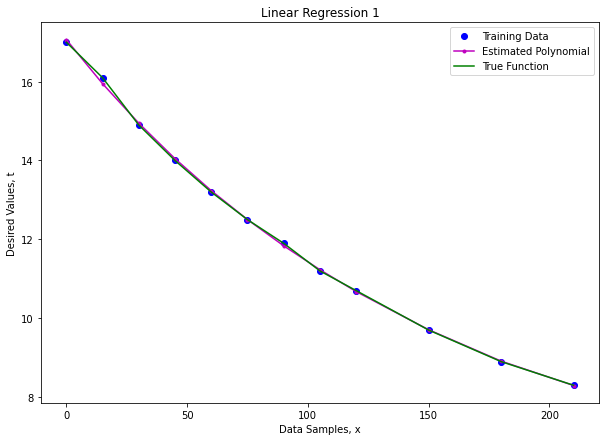

In [6]:
M = 4 #select model order
w1, y1_train = PolynomialRegression(x1_train,t1_train,M) 

plt.figure(figsize=(10,7))
plt.plot(x1_train,t1_train,'bo', label='Training Data')
plt.plot(x1_train,y1_train,'.-m', label = 'Estimated Polynomial')
plt.plot(x1_train,t1_train,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');
plt.title('Linear Regression 1');

### Model 2 (Brand 2)

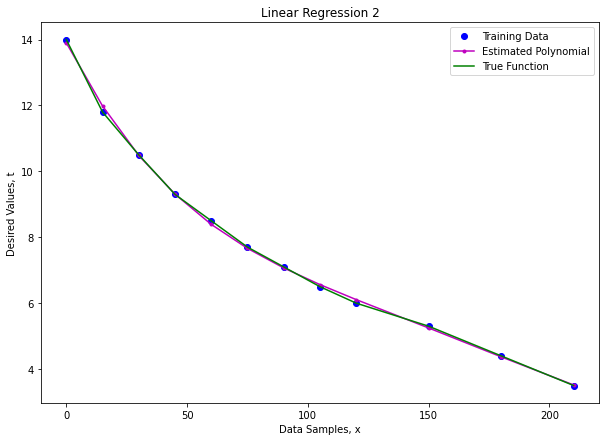

In [7]:
M = 4 #select model order
w2, y2_train = PolynomialRegression(x2_train,t2_train,M) 

plt.figure(figsize=(10,7))
plt.plot(x2_train,t2_train,'bo', label='Training Data')
plt.plot(x2_train,y2_train,'.-m', label = 'Estimated Polynomial')
plt.plot(x2_train,t2_train,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');
plt.title('Linear Regression 2');

### Model 3 (Brand 3)

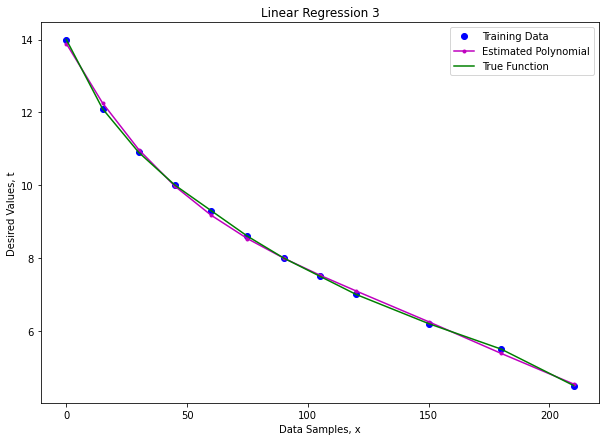

In [8]:
M = 4 #select model order
w3, y3_train = PolynomialRegression(x3_train,t3_train,M) 

plt.figure(figsize=(10,7))
plt.plot(x3_train,t3_train,'bo', label='Training Data')
plt.plot(x3_train,y3_train,'.-m', label = 'Estimated Polynomial')
plt.plot(x3_train,t3_train,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');
plt.title('Linear Regression 3');

## Polynomial regression models (1-3)

### Polynomial regression with regularization

In [9]:
def PolynomialRegression_reg(x,t,M,lam):
    # Compute feature matrix X with polynomial features
    X = np.array([x**m for m in range(M+1)]).T
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X + lam*np.eye(M+1))@X.T@t
    # Compute model prediction
    y = X@w
    return w, y

In [10]:
def PolynomialRegression_test(x,M,w):
    # Feature matrix for test set
    X = np.array([x**m for m in range(M+1)]).T
    
    # Prediction for test set
    y = X@w
    
    return y

### Test Polynomial Regression w/ Regurlarization (Brand 1)

In [11]:
M = 4
test1_errors =[]
lams = [0.0]
lambdas = [[i] for i in lams]
for lams in lambdas:
    w1reg, y1reg = PolynomialRegression_reg(x1_train,t1_train,M,lams) 
    test1_errors.append(0.5*np.sum((t1_train-y1reg)**2))
l1 = lambdas[np.argmin(test1_errors)]
print('Best Lambda:',l1)    

Best Lambda: [0.0]


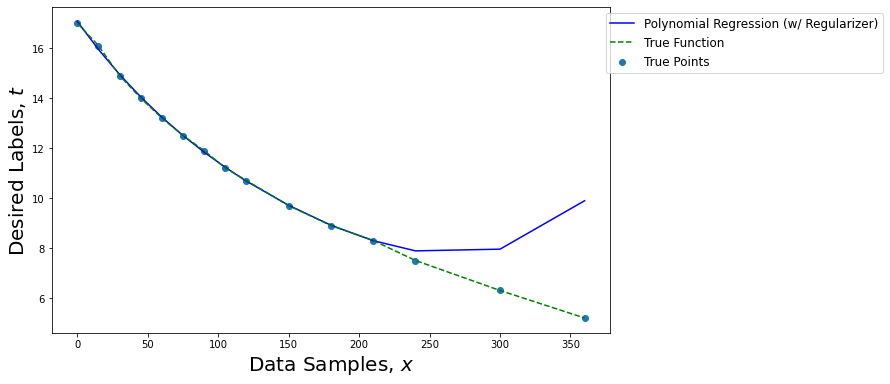

In [12]:
y1_pred = PolynomialRegression_test(x1_true, M, w1reg)

fig=plt.figure(figsize=(10,6))
plt.scatter(x1_true,t1_true, label='True Points')
plt.plot(x1_true, y1_pred, 'b',label = 'Polynomial Regression (w/ Regularizer)')
plt.plot(x1_true, t1_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

mse1_poly = 0.5*np.sum((t1_true-y1_pred)**2)

### Test Polynomial Regression w/ Regurlarization (Brand 2)

In [13]:
M = 4
test2_errors =[]
lams = [0.0]
lambdas = [[i] for i in lams]
for lams in lambdas:
    w2reg, y2reg = PolynomialRegression_reg(x2_train,t2_train,M,lams) 
    test2_errors.append(0.5*np.sum((t2_train-y2reg)**2))
l2 = lambdas[np.argmin(test2_errors)]
print('Best Lambda:',l2)   

Best Lambda: [0.0]


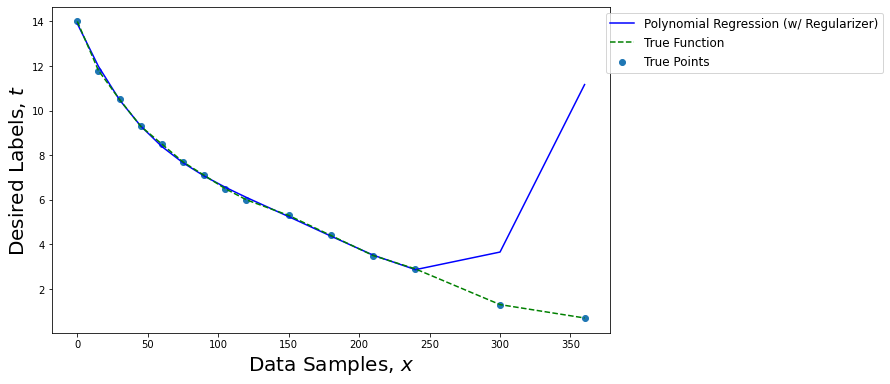

In [14]:
y2_pred = PolynomialRegression_test(x2_true, M, w2reg)

fig=plt.figure(figsize=(10,6))
plt.scatter(x2_true,t2_true, label='True Points')
plt.plot(x2_true, y2_pred, 'b',label = 'Polynomial Regression (w/ Regularizer)')
plt.plot(x2_true, t2_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

mse2_poly = 0.5*np.sum((t2_true-y2_pred)**2)

### Test Polynomial Regression w/ Regurlarization (Brand 3)

In [15]:
M = 4
test3_errors =[]
lams = [0.0]
lambdas = [[i] for i in lams]
for lams in lambdas:
    w3reg, y3reg = PolynomialRegression_reg(x3_train,t3_train,M,lams) 
    test3_errors.append(0.5*np.sum((t3_train-y3reg)**2))
l3 = lambdas[np.argmin(test3_errors)]
print('Best Lambda:',l3) 

Best Lambda: [0.0]


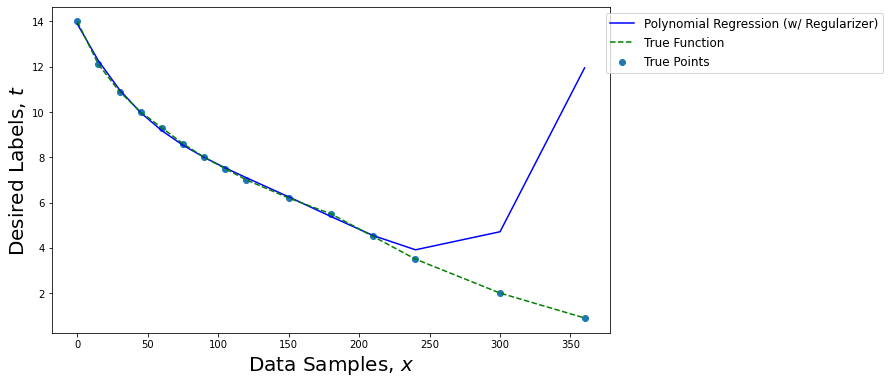

In [16]:
y3_pred = PolynomialRegression_test(x3_true, M, w3reg)

fig=plt.figure(figsize=(10,6))
plt.scatter(x3_true,t3_true, label='True Points')
plt.plot(x3_true, y3_pred, 'b',label = 'Polynomial Regression (w/ Regularizer)')
plt.plot(x3_true, t3_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);


mse3_poly = 0.5*np.sum((t3_true-y3_pred)**2)

## Define Exponential Model

In [17]:
def LinRegression_Exp(x,t):
    '''Fit a gaussian of order M to the data input data x and desire values t'''
    
    # Feature Matrix X
    ones = np.ones(len(x))
    X = np.array([ones, x]).T
    
    # Coefficients w
    w = np.linalg.inv(X.T@X)@X.T@np.log(t)
    
    # Model prediction, y = Xw
    y=np.exp(X@w)
    
    return w,y

### Exp Model 1 (Brand 1)

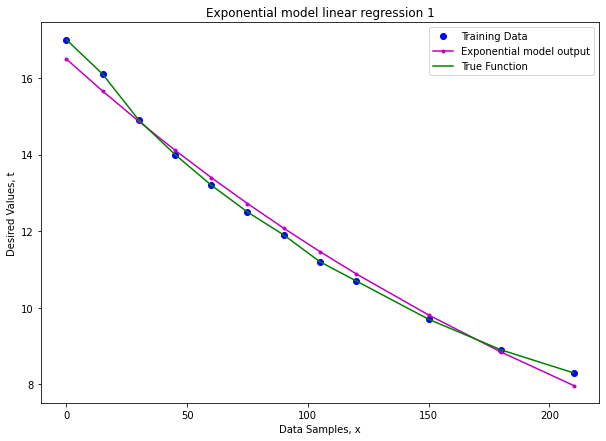

In [18]:
w1,y1 = LinRegression_Exp(x1_train,t1_train) 

plt.figure(figsize=(10,7))
plt.plot(x1_train,t1_train,'bo', label='Training Data')
plt.plot(x1_train,y1,'.-m', label = 'Exponential model output')
plt.plot(x1_train,t1_train,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');
plt.title('Exponential model linear regression 1');

### Exp Model 2 (Brand 2)

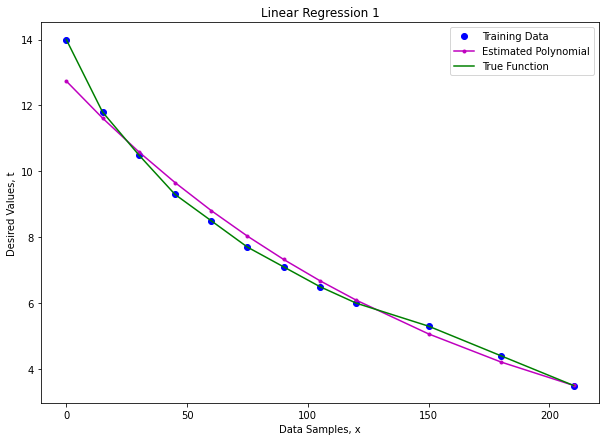

In [19]:
w2,y2 = LinRegression_Exp(x2_train,t2_train) 

plt.figure(figsize=(10,7))
plt.plot(x2_train,t2_train,'bo', label='Training Data')
plt.plot(x2_train,y2,'.-m', label = 'Estimated Polynomial')
plt.plot(x2_train,t2_train,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');
plt.title('Linear Regression 1');

### Exp Model 3 (Brand 3)

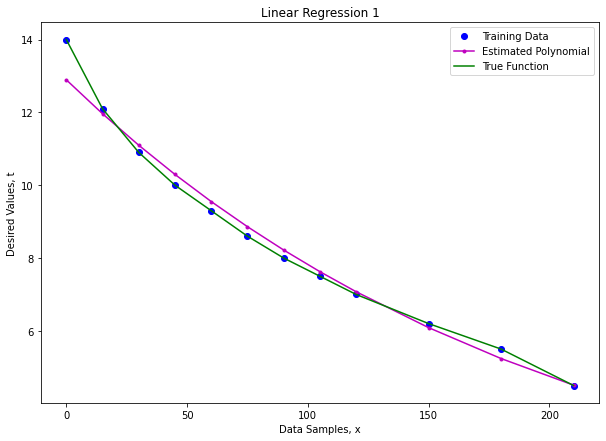

In [20]:
w3,y3 = LinRegression_Exp(x3_train,t3_train) 

plt.figure(figsize=(10,7))
plt.plot(x3_train,t3_train,'bo', label='Training Data')
plt.plot(x3_train,y3,'.-m', label = 'Estimated Polynomial')
plt.plot(x3_train,t3_train,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');
plt.title('Linear Regression 1');

### TEST Exp Model 1 (Brand 1)

In [21]:
def LinRegressionExp_test(x,w):
    
    # Feature Matrix X
    ones = np.ones(len(x))
    X = np.array([ones, x]).T
    
    # Model prediction, y = Xw
    y=np.exp(X@w)
    
    return y

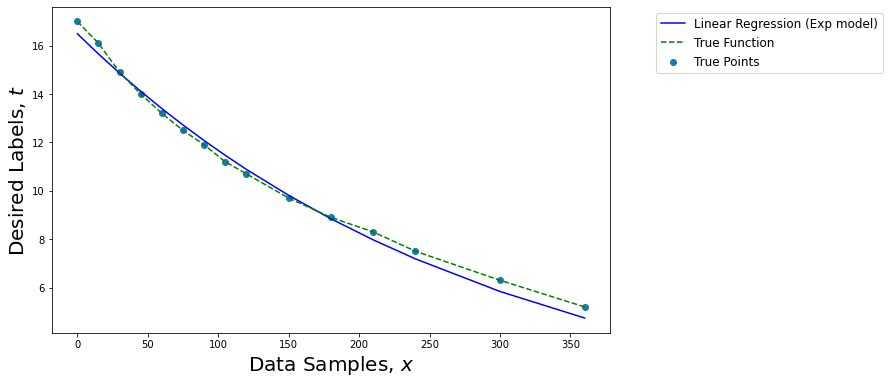

In [22]:
y1_pred_exp = LinRegressionExp_test(x1_true,w1)

fig=plt.figure(figsize=(10,6))
plt.scatter(x1_true,t1_true, label='True Points')
plt.plot(x1_true, y1_pred_exp, 'b',label = 'Linear Regression (Exp model)')
plt.plot(x1_true, t1_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

mse1_exp = 0.5*np.sum((t1_true-y1_pred_exp)**2)

### TEST Exp Model 2 (Brand 2)

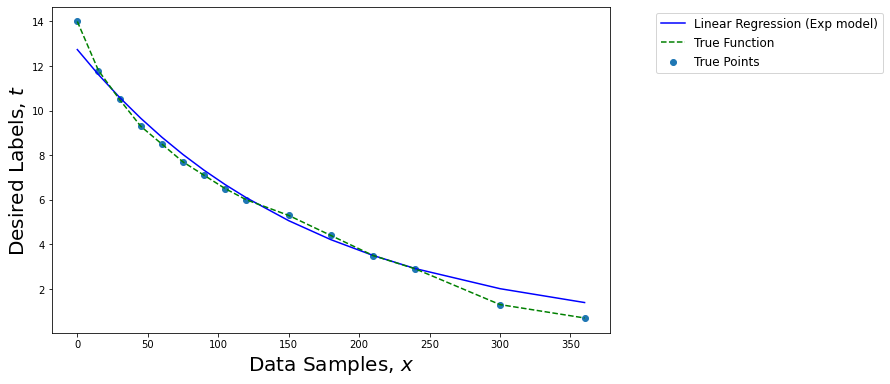

In [23]:
y2_pred_exp = LinRegressionExp_test(x2_true,w2)

fig=plt.figure(figsize=(10,6))
plt.scatter(x2_true,t2_true, label='True Points')
plt.plot(x2_true, y2_pred_exp, 'b',label = 'Linear Regression (Exp model)')
plt.plot(x2_true, t2_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

mse2_exp = 0.5*np.sum((t2_true-y2_pred_exp)**2)

### TEST Exp Model 3 (Brand 3)

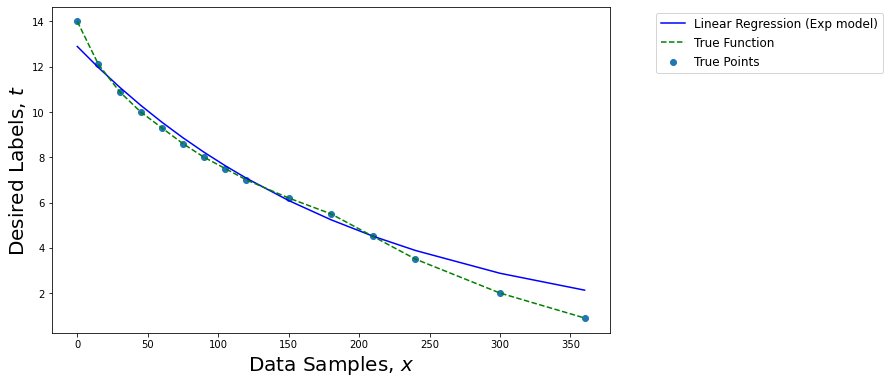

In [24]:
y3_pred_exp = LinRegressionExp_test(x3_true,w3)

fig=plt.figure(figsize=(10,6))
plt.scatter(x3_true,t3_true, label='True Points')
plt.plot(x3_true, y3_pred_exp, 'b',label = 'Linear Regression (Exp model)')
plt.plot(x3_true, t3_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

mse3_exp = 0.5*np.sum((t3_true-y3_pred_exp)**2)

## 3. Predict height at 450sec

### Polynomial Regression Model 1 (Brand 1)

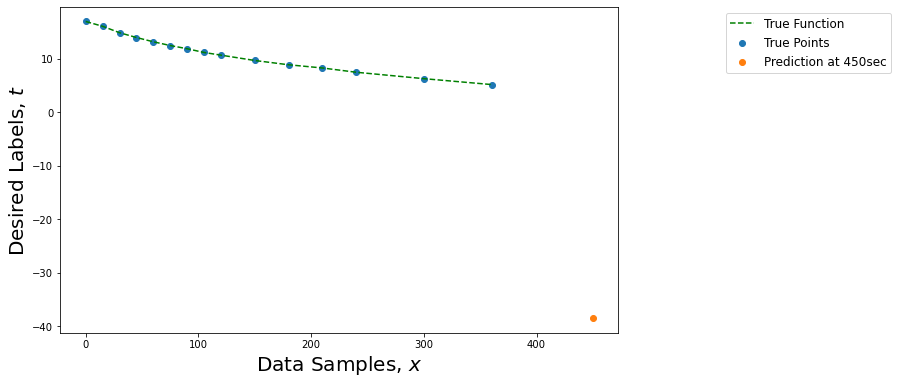

In [25]:
#PREDICT AT 450sec
# x1_new = np.linspace(0,450,15,dtype=int)

x1_new = np.array([450])
X1_pred = np.array([x1_new**m for m in range(M+1)]).T

#X1_new = np.array([x1_new**m for m in range(M+1)]).T
w1pred, y1reg = PolynomialRegression_reg(x1_train,t1_train,M,l1) 
y1_pred_reg = X1_pred@w1pred

fig=plt.figure(figsize=(10,6))
plt.scatter(x1_true,t1_true, label='True Points')
plt.scatter(x1_new, y1_pred_reg,label = 'Prediction at 450sec')
plt.plot(x1_true,t1_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

### Polynomial Regression Model 2 (Brand 2)

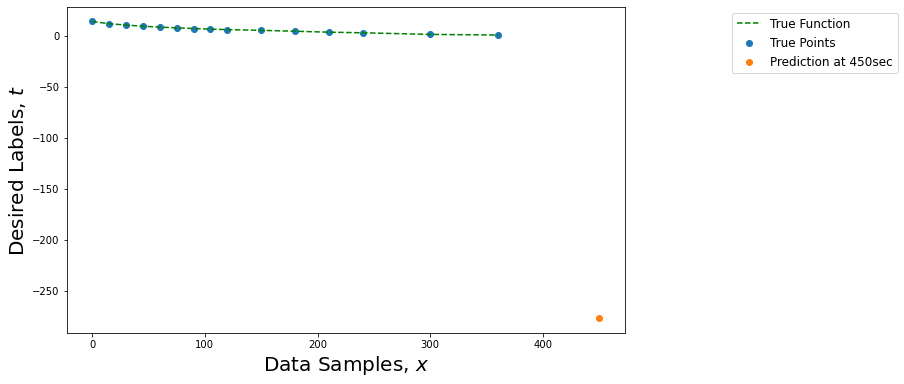

In [26]:
#PREDICT AT 450sec using Model 2

x2_new = np.array([450])
X2_pred = np.array([x2_new**m for m in range(M+1)]).T

#X1_new = np.array([x1_new**m for m in range(M+1)]).T
w2pred, y2reg = PolynomialRegression_reg(x2_train,t2_train,M,l2) 
y2_pred_reg = X2_pred@w2pred

fig=plt.figure(figsize=(10,6))
plt.scatter(x2_true,t2_true, label='True Points')
plt.scatter(x2_new, y2_pred_reg,label = 'Prediction at 450sec')
plt.plot(x2_true,t2_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

### Polynomial Regression Model 3 (Brand 3)

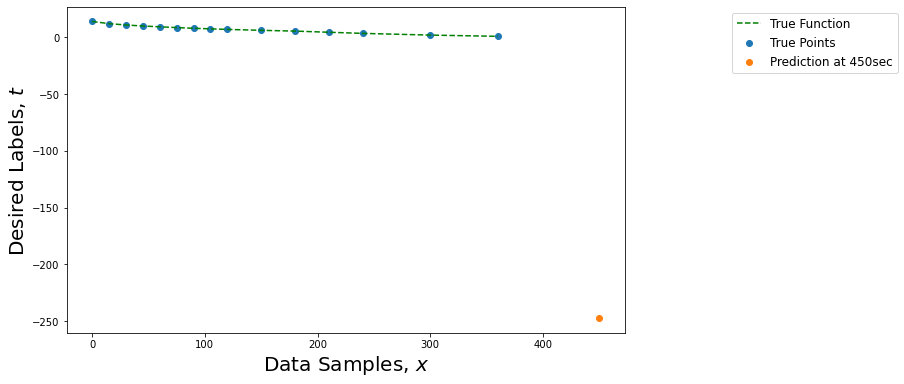

In [27]:
#PREDICT AT 450sec
# x1_new = np.linspace(0,450,15,dtype=int)

x3_new = np.array([450])
X3_pred = np.array([x3_new**m for m in range(M+1)]).T

#X1_new = np.array([x1_new**m for m in range(M+1)]).T
w3pred, y3reg = PolynomialRegression_reg(x3_train,t3_train,M,l1) 
y3_pred_reg = X3_pred@w3pred

fig=plt.figure(figsize=(10,6))
plt.scatter(x3_true,t3_true, label='True Points')
plt.scatter(x3_new, y3_pred_reg,label = 'Prediction at 450sec')
plt.plot(x3_true,t3_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

### Exp Model 1 (Brand 1)

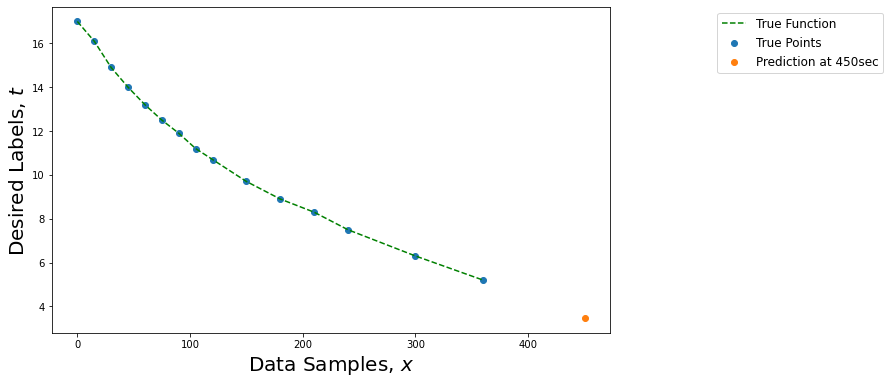

In [28]:
x1_new = np.array([450])

y1reg = LinRegressionExp_test(x1_new,w1) 

fig=plt.figure(figsize=(10,6))
plt.scatter(x1_true,t1_true, label='True Points')
plt.scatter(x1_new, y1reg,label = 'Prediction at 450sec')
plt.plot(x1_true,t1_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

### Exp Model 2 (Brand 2)

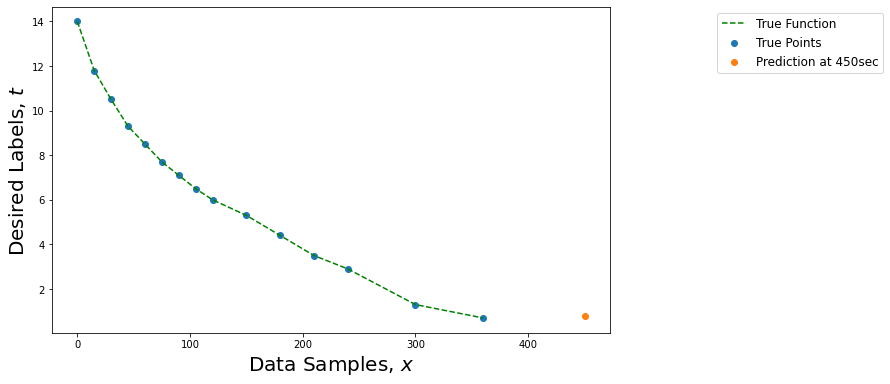

In [29]:
x2_new = np.array([450])

y2reg = LinRegressionExp_test(x2_new,w2) 

fig=plt.figure(figsize=(10,6))
plt.scatter(x2_true,t2_true, label='True Points')
plt.scatter(x2_new, y2reg,label = 'Prediction at 450sec')
plt.plot(x2_true,t2_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

### Exp Model 3 (Brand 3)

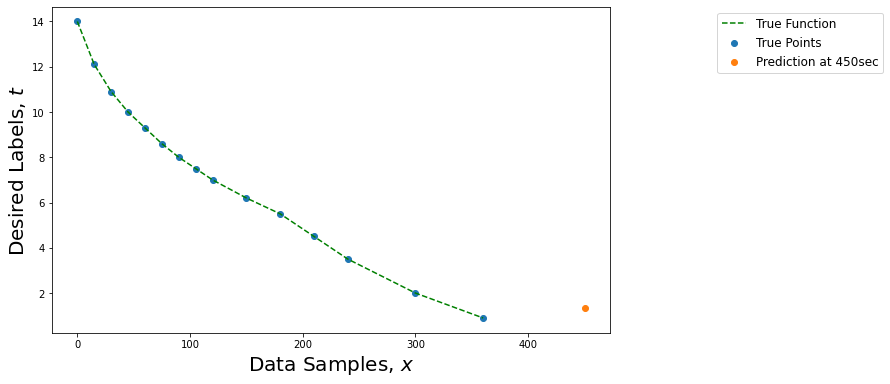

In [30]:
x3_new = np.array([450])

y3reg = LinRegressionExp_test(x3_new,w3) 

fig=plt.figure(figsize=(10,6))
plt.scatter(x3_true,t3_true, label='True Points')
plt.scatter(x3_new, y3reg,label = 'Prediction at 450sec')
plt.plot(x3_true,t3_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

## 4. Compare both models using plots (qualitative measure) and select a measure to assess the goodness-of-fit (quantitative measure, e.g. MSE)

### Plot (qualitative) comparison

### Polynomial Model 1 vs Exponential Model 1

In [31]:
y1_pred = PolynomialRegression_test(x1_true, M, w1reg)
y1_pred_exp = LinRegressionExp_test(x1_true,w1)

Text(0.5, 1.0, 'Plot comparison: Polyn vs Exp Regression (Brand 1)')

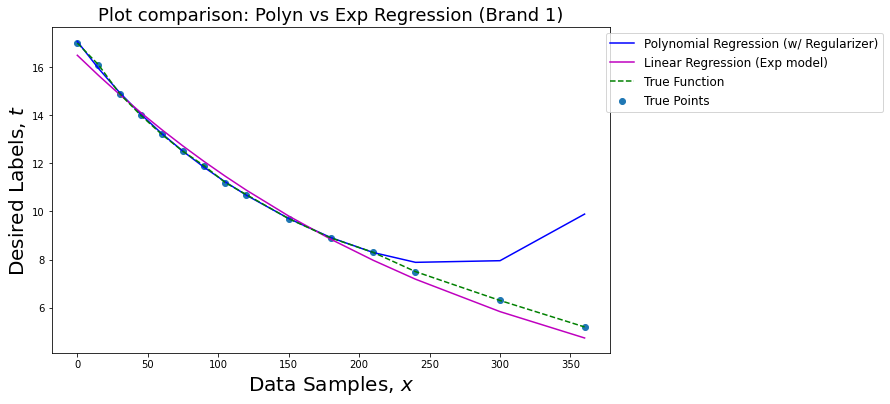

In [32]:
fig=plt.figure(figsize=(10,6))
plt.scatter(x1_true,t1_true, label='True Points')
plt.plot(x1_true, y1_pred, 'b',label = 'Polynomial Regression (w/ Regularizer)')
plt.plot(x1_true, y1_pred_exp, 'm',label = 'Linear Regression (Exp model)')
plt.plot(x1_true, t1_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);
plt.title('Plot comparison: Polyn vs Exp Regression (Brand 1)',fontsize=18)

**Comparison of models:**
For the given training set, the polynomial regression model fits the training data better than the exponential model -- nearly exactly. This is perhaps due to overfitting. Consequently, the polynomial model may fail to generalize to new data when compared with the exponential model.  The 4th order polynomial model could benefit from use of a regularizer to reduce its overfitting/high variance

### Polynomial Model 2 vs Exponential Model 2

In [33]:
y2_pred = PolynomialRegression_test(x2_true, M, w2reg)
y2_pred_exp = LinRegressionExp_test(x2_true,w2)

Text(0.5, 1.0, 'Plot comparison: Polyn vs Exp Regression (Brand 2)')

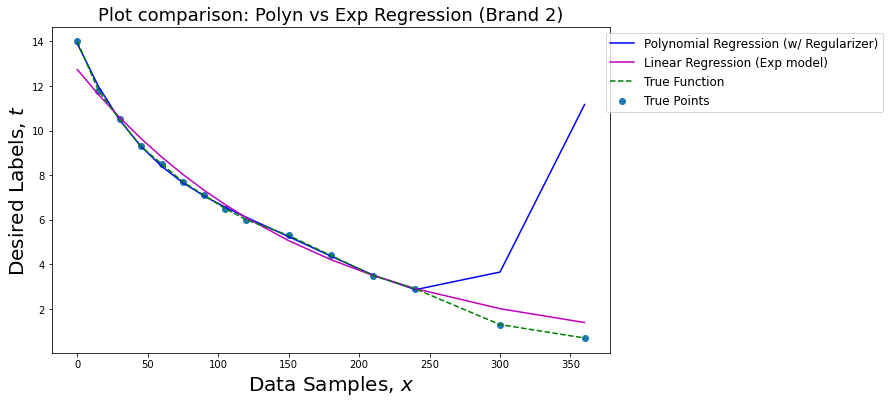

In [34]:
fig=plt.figure(figsize=(10,6))
plt.scatter(x2_true,t2_true, label='True Points')
plt.plot(x2_true, y2_pred, 'b',label = 'Polynomial Regression (w/ Regularizer)')
plt.plot(x2_true, y2_pred_exp, 'm',label = 'Linear Regression (Exp model)')
plt.plot(x2_true, t2_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);
plt.title('Plot comparison: Polyn vs Exp Regression (Brand 2)',fontsize=18)

**Comparison of models:**
For the given training set, the polynomial regression model (with regularizer) fits the training data better than the exponential model -- nearly exactly. This is perhaps due to overfitting. Consequently, the polynomial model may fail to generalize to new data when compared with the exponential model.

### Polynomial Model 3 vs Exponential Model 3

In [35]:
y3_pred = PolynomialRegression_test(x3_true, M, w3reg)
y3_pred_exp = LinRegressionExp_test(x3_true,w3)

Text(0.5, 1.0, 'Plot comparison: Polyn vs Exp Regression (Brand 3)')

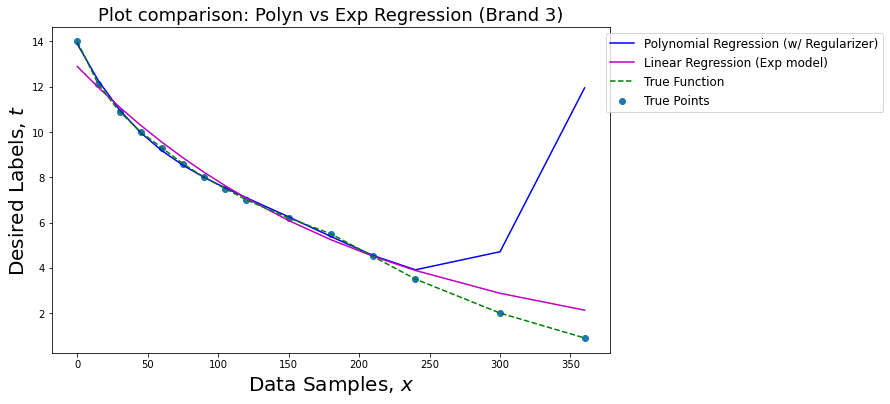

In [36]:
fig=plt.figure(figsize=(10,6))
plt.scatter(x3_true,t3_true, label='True Points')
plt.plot(x3_true, y3_pred, 'b',label = 'Polynomial Regression (w/ Regularizer)')
plt.plot(x3_true, y3_pred_exp, 'm',label = 'Linear Regression (Exp model)')
plt.plot(x3_true, t3_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);
plt.title('Plot comparison: Polyn vs Exp Regression (Brand 3)',fontsize=18)

**Comparison of models:**
For the given training set, the polynomial regression model (with regularizer) fits the training data better than the exponential model -- nearly exactly. This is perhaps due to overfitting. Consequently, the polynomial model may fail to generalize to new data when compared with the exponential model.

### Goodness of Fit (MSE Test): Use average of MSE scores for polynomial vs. exponential models

Using MSE scores obtained from testing polynomial regression models (1-3):

In [37]:
print('MSE for Polynomial Model 1:', mse1_poly)
print('MSE for Polynomial Model 2:', mse2_poly)
print('MSE for Polynomial Model 3:', mse3_poly)

MSE for Polynomial Model 1: 12.465959548470064
MSE for Polynomial Model 2: 57.622153258662784
MSE for Polynomial Model 3: 64.84278041407696


In [38]:
print('Average of MSE scores (Polynomial Models):',(1/3)*(mse1_poly + mse2_poly + mse3_poly))

Average of MSE scores (Polynomial Models): 44.97696440706993


Using MSE scores obtained from testing exponential regression models (1-3):

In [39]:
print('MSE for Exponential Model 1:', mse1_exp)
print('MSE for Exponential Model 2:', mse2_exp)
print('MSE for Exponential Model 3:', mse3_exp)

MSE for Exponential Model 1: 0.6696559055050737
MSE for Exponential Model 2: 1.5689247747949917
MSE for Exponential Model 3: 2.034737996494934


In [40]:
print('Average of MSE scores (Exponential Models):',(1/3)*(mse1_exp + mse2_exp + mse3_exp))

Average of MSE scores (Exponential Models): 1.4244395589316663


The best average MSE score goes to the class of exponential regression models.  Regarding the prediction accuracy, prior knowledge of the exponential fit of $H(t)=H_{0}e^{{-\lambda}t}$ may imply that the exponential model will provide a better prediction for future value.  The exponential model prediction value is more consistent with this type of decay than the prediction values obtained with the polynomial model.

# Question 2

In [4]:
%matplotlib inline
plt.style.use('bmh')

def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

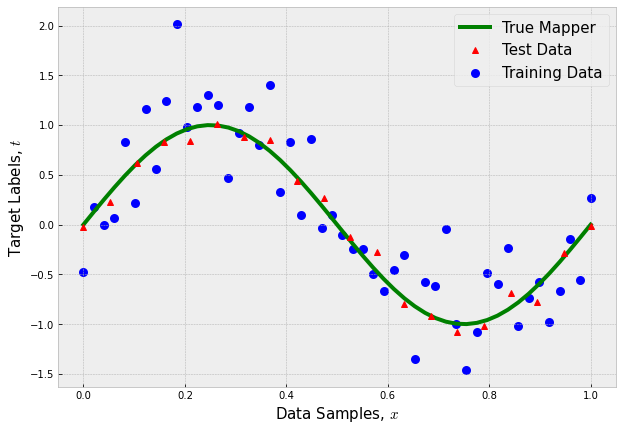

In [5]:
# Generate input samples and desired values
N_train = 50 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.1 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

# Plotting
plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

## Build a linear regression model with Gaussian basis functions

In [6]:
def LinearRegression_Gaussian(x,t,M,sigma,mu):
    '''Fit a Gaussian model with range of mu to the data input data x and desire values t'''
    
    # Feature Matrix X
    X=np.array([np.exp((-1/((2*sigma)**2))*(x-mu[i])**2) for i in range(M)]).T
    
    # Coefficients w
    w = np.linalg.inv(X.T@X)@X.T@t  #inv(X.T@X)@X.T is the pseudoinverse of X
    
    # Model prediction, y = Xw
    y=X@w
    
    return w,y

## Train Gaussian model on training set

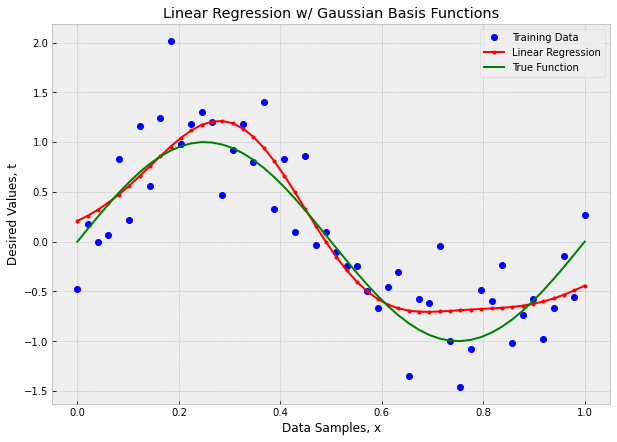

In [7]:
M = 4 #select model order
mu = np.array([0.1, 0.3, 0.6, 0.9])
sigma = 0.1

# Find the parameters that fit the noisy sinusoidal
w, y_train = LinearRegression_Gaussian(x_train,t_train,M,sigma,mu) 

plt.figure(figsize=(10,7))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Linear Regression')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');
plt.title('Linear Regression w/ Gaussian Basis Functions');

## Make predictions using test set

In [8]:
def LinearRegression_Gaussian_test(x, sigma, mu, w):
    '''Fit a Gaussian model with range mu and weights w to the data input data x and desire values t'''
    
    # Feature Matrix X
    X=np.array([np.exp((-1/((2*sigma)**2))*(x-mu[i])**2) for i in range(M)]).T
    
    # Model prediction, y = Xw
    y=X@w
    
    return y

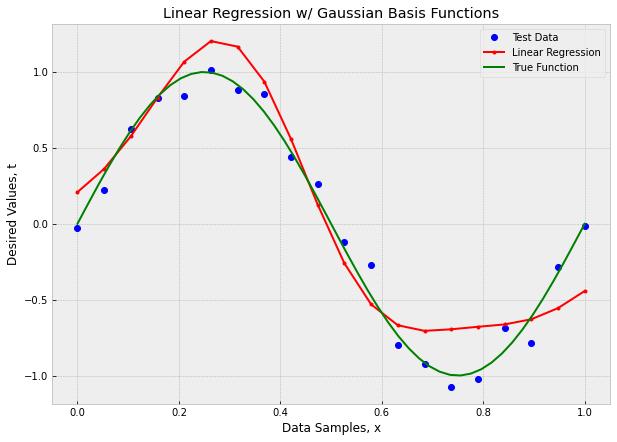

In [9]:
sigma = 0.1
mu = np.array([0.1, 0.3, 0.6, 0.9])
y_test = LinearRegression_Gaussian_test(x_test, sigma, mu, w) 

plt.figure(figsize=(10,7))
plt.plot(x_test, t_test,'bo', label='Test Data')
plt.plot(x_test, y_test,'.-r', label = 'Linear Regression')
plt.plot(x_true, t_true,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');
plt.title('Linear Regression w/ Gaussian Basis Functions');

## Finding $\mu$s, $\sigma$, and number of gaussians

After determining parameters for the basis function $\mathrm{e}^\dfrac{-(x_{i}-\mu_{j})^2}{2\sigma^2}$, namely $\mu$ and $\sigma$, optimal values for the parameters can be searched using k-fold cross-validation.  Since the values t are observed on the interval $y$, [-1,1] and the domain of x is $x$, [0,1], we might begin looking at $\sigma$s from (0,1] and $\mu$s from [0,1]. We could then locate the best average validation score (avg_perf_val) and fine-tune those parameters until a satisfactory score is obtained. We would use that combination of $\mu$, $\sigma$, and number of gaussians.

In [10]:
from sklearn.model_selection import KFold

k = 4 # number of folds

kf = KFold(n_splits=k,shuffle=True)

In [11]:
# Values for number of gaussians, sigmas, and arrays of mu for inital parameter search.  Fine-tune around obtained best params
gaussians = np.array([1,2,3,4]) # candidate #gaussians array
sigmas = np.array([.3, .4, .5, .7]) # candidate sigma array
mus = np.array([[0.0,0.1,0.2,0.3],[0.1,0.2,0.3,0.4],[0.2,0.3,0.4,0.5],[0.3,0.4,0.5,0.6]]) # candidate mu array of arrays

In [23]:
len(avg_perf_val)

256

In [12]:
avg_perf_val = []

for M in gaussians:
    for sig in sigmas:
        for mu in mus:
            print('M Value = ',M)
            print('Sigma Value = ',sig)
            print('Mus=', mu)
            # For each training/validation split
            f=1
        
            #initialize performance measures
            MSE_train_avg,MSE_val_avg = 0, 0
        
            for train_index, validation_index in kf.split(x_train):
                print('\nFold ',f)
            
                # Select training set using the indices found from kf.split
                x_train2, x_validation = x_train[train_index], x_train[validation_index]
            
                # Select validation set using the indices found from kf.split
                t_train2, t_validation = t_train[train_index], t_train[validation_index]
            
                # Training model with training set
                w, y_train = LinearRegression_Gaussian(x_train, t_train, M, sig, mu)
            
                # Evaluate trained model in validation set
                y_val = LinearRegression_Gaussian_test(x_validation, sig, mu, w)
            
                # Performance Measure
                MSE_train = np.mean((t_train-y_train)**2)
                MSE_val   = np.mean((t_validation-y_val)**2)
                
                # Average performance measure
                MSE_train_avg = MSE_train_avg+MSE_train
                MSE_val_avg = MSE_val_avg+MSE_val
                print('MSE Training = ', MSE_train)
                print('MSE Validation = ', MSE_val)
                f+=1
                avg_perf_val.append(MSE_val_avg/k)
            print('\nAverage Performance in Training = ', MSE_train_avg/k)
            print('Average Performance in Validation = ', MSE_val_avg/k)
            print('__________________________________________________________')

M Value =  1
Sigma Value =  0.3
Mus= [0.  0.1 0.2 0.3]

Fold  1
MSE Training =  0.5246686750174497
MSE Validation =  0.6140683237649195

Fold  2
MSE Training =  0.5246686750174497
MSE Validation =  0.5172886079694347

Fold  3
MSE Training =  0.5246686750174497
MSE Validation =  0.5314432792030902

Fold  4
MSE Training =  0.5246686750174497
MSE Validation =  0.4290395239907332

Average Performance in Training =  0.5246686750174497
Average Performance in Validation =  0.5229599337320443
__________________________________________________________
M Value =  1
Sigma Value =  0.3
Mus= [0.1 0.2 0.3 0.4]

Fold  1
MSE Training =  0.5456458154149655
MSE Validation =  0.49933111715934636

Fold  2
MSE Training =  0.5456458154149655
MSE Validation =  0.8401742084422585

Fold  3
MSE Training =  0.5456458154149655
MSE Validation =  0.31250316321799926

Fold  4
MSE Training =  0.5456458154149655
MSE Validation =  0.5098902982759521

Average Performance in Training =  0.5456458154149655
Average Perform

In [25]:
print('Best avg performance in validation score:', np.min(avg_perf_val))

Best avg performance in validation score: 0.0109849564232764
